# Clustering

**Theoretical Questions:**

1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the model is trained on unlabeled data, meaning the output labels are unknown. The goal is to find patterns, structures, or groupings in the data, such as clustering similar data points or reducing dimensionality.

Example: Customer segmentation based on purchasing behavior.

2. How does K-Means clustering algorithm work?

K-Means is an iterative clustering algorithm that partitions data into K clusters by minimizing the within-cluster variance. Steps:

Randomly initialize K centroids.

Assign each data point to the nearest centroid (forming clusters).

Update centroids as the mean of points in each cluster.

Repeat steps 2-3 until centroids stabilize (convergence).

3. Explain the concept of a dendrogram in hierarchical clustering

A dendrogram is a tree-like diagram that shows the hierarchical relationships between data points or clusters.

Leaves: Individual data points

Branches: Merged clusters

Height: Distance at which clusters are merged

It helps visualize cluster merging or splitting at different thresholds.

4. What is the main difference between K-Means and Hierarchical Clustering
Feature	K-Means	Hierarchical Clustering
Approach	Partition-based (predefined K)	Agglomerative or divisive (tree-based)
Output	K clusters	Dendrogram (can choose any number of clusters)
Scalability	Scales to large datasets	Computationally expensive on large datasets
Cluster Shape	Assumes spherical clusters	Can handle irregular shapes

5. What are the advantages of DBSCAN over K-Means

Can find arbitrarily shaped clusters.

Automatically identifies noise/outliers.

No need to specify the number of clusters K in advance.


6. When would you use Silhouette Score in clustering

Silhouette Score measures how well each point fits within its cluster and how distinct clusters are.

Value range: -1 to 1

Use it to evaluate clustering quality or choose the optimal number of clusters.


7. What are the limitations of Hierarchical Clustering

Computationally expensive (O(n²) to O(n³)) for large datasets.

Sensitive to noise/outliers.

Once merged or split, decisions are irreversible.

Struggles with clusters of different shapes and densities.


8. Why is feature scaling important in clustering algorithms like K-Means

K-Means uses Euclidean distance to assign points to clusters.

Features with larger scales dominate the distance.

Scaling ensures all features contribute equally (e.g., using StandardScaler or MinMaxScaler).


9. How does DBSCAN identify noise points

DBSCAN defines points as:

Core point: Has at least minPts within ε radius.

Border point: Fewer than minPts neighbors but near a core point.

Noise point: Neither core nor border.

Noise points are not assigned to any cluster.


10. Define inertia in the context of K-Means

Inertia (a.k.a. within-cluster sum of squares) measures how tightly the points are clustered around centroids.

Lower inertia → tighter clusters.

Formula:

Inertia
=
∑
𝑖
=
1
𝐾
∑
𝑥
∈
𝐶
𝑖
∥
𝑥
−
𝜇
𝑖
∥
2
Inertia=
i=1
∑
K
	​

x∈C
i
	​

∑
	​

∥x−μ
i
	​

∥
2


11. What is the elbow method in K-Means clustering

The elbow method helps choose the optimal K:

Compute K-Means for different K values.

Plot inertia vs K.

Look for the “elbow” point where inertia decrease slows → optimal K.


12. Describe the concept of "density" in DBSCAN

Density refers to the number of points within a neighborhood (radius ε):

High-density regions → clusters

Low-density regions → noise or cluster boundary


13. Can hierarchical clustering be used on categorical data

Yes, but you need an appropriate distance metric, like:

Hamming distance

Jaccard distance
Standard Euclidean distance is not suitable for categorical features.


14. What does a negative Silhouette Score indicate

A negative Silhouette Score means:

A point is closer to a different cluster than its assigned cluster.

The clustering assignment is likely incorrect for that point.


15. Explain the term "linkage criteria" in hierarchical clustering

Linkage criteria define how to measure distance between clusters when merging:

Single linkage: Minimum distance between points in clusters

Complete linkage: Maximum distance

Average linkage: Average distance

Ward linkage: Minimizes variance increase


16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities

K-Means assumes spherical clusters of similar size.

Larger or denser clusters dominate centroid placement.

Clusters with different densities or elongated shapes → misclassified points.


17. What are the core parameters in DBSCAN, and how do they influence clustering

ε (eps): Radius to search for neighbors → controls cluster tightness

minPts: Minimum points to form a dense region → affects cluster size

Changing these parameters changes the number of clusters and noise detection.


18. How does K-Means++ improve upon standard K-Means initialization

K-Means++ initializes centroids more intelligently:

First centroid: random

Next centroids: probabilistically chosen far from existing centroids

Reduces chance of poor local minima, improves convergence and clustering quality.


19. What is agglomerative clustering

Agglomerative clustering is a bottom-up hierarchical clustering:

Each point starts as a single cluster.

Merge the closest clusters step by step.

Continue until all points merge or desired number of clusters is reached.


20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Inertia only measures compactness, ignores separation between clusters.

Silhouette Score considers both:

Cohesion: how close points are to their cluster

Separation: how far points are from other clusters

Gives a more holistic view of clustering quality.

# Practical Questions:

**21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.**

Ans :


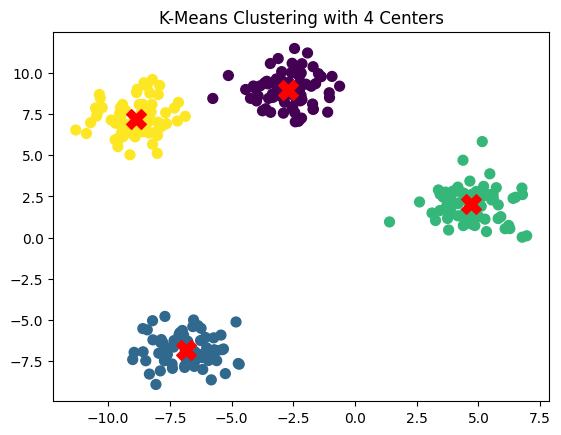

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='X', s=200)
plt.title('K-Means Clustering with 4 Centers')
plt.show()

**22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


**23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.**

Ans:

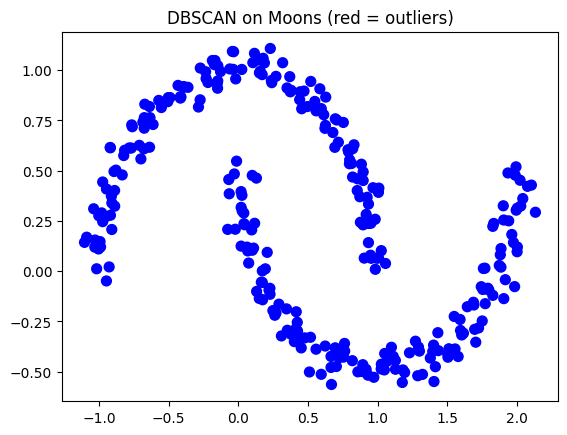

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=np.where(y_pred==-1, 'red', 'blue'), s=50)
plt.title('DBSCAN on Moons (red = outliers)')
plt.show()


**24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.**

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Count cluster sizes
unique, counts = np.unique(y_pred, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples")


Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


**25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.**

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['0', '0', '0', '13', '1', '1', '0', '2', '3', '0', '1', 'red', '1',
       '4', '0', '1', '0', '0', 'red', '0', '8', '2', '0', '0', '17', '4',
       '0', '0', '0', '1', '10', '0', 'red', '15', '1', 'red', '3', 'red',
       '4', 'red', '5', 'red', '0', '6', '8', '6', '1', '1', '2', '1',
       '0', '16', '1', 'red', '0', '0', '7', '5', '0', '15', '1', '6',
       '3', '0', '0', 'red', '15', '0', 'red', '0', '2', '9', '1', '0',
       '11', 'red', '8', '8', 'red', '0', '0', '0', '15', '9', '8', 'red',
       'red', 'red', '10', '13', '0', '17', 'red', '1', 'red', '10', '0',
       '16', '0', 'red', '1', 'red', 'red', '0', '0', '1', '12', '10',
       '0', '7', '11', '0', 'red', '0', '0', 'red', '16', '0', '0', '0',
       'red', '0', '0', '0', 'red', '0', 'red', '9', '0', '0', '12', '2',
       '0', 'red', '0', '0', '0', '0', '0', '3', 'red', '16', '0', '9',
       '1', '0', 'red', 'red', 'red', 'red', '0', '17', '1', '0', '0',
       '0', '1', '6', '0', 'red', '1', '0', '13', 'red', 'red', 'red',
       '0', '0', '0', '14', '5', '0', '0', '4', '5', '0', '12', 'red',
       'red', 'red', '0', 'red', '0', '0', '7', '0', '0', '0', '7', 'red',
       '6', '0', '1', '0', '0', '13', '0', '0', 'red', '1', '3', '9',
       'red', '0', '0', '0', '0', '12', '6', '12', '11', '0', 'red',
       'red', '0', '6', '4', '0', '0', 'red', 'red', '0', '1', 'red',
       '15', '0', 'red', '8', '0', '1', '4', '0', '0', '0', '0', '10',
       'red', '5', '0', '1', '0', 'red', '0', '4', '1', '16', '0', '1',
       '0', '3', '17', '14', '11', '3', '11', '17', 'red', '8', '0',
       'red', '5', '14', '0', '13', 'red', '0', '0', 'red', '0', '0',
       '14', '14', '0', '0', '0', '0', '0', 'red', '14', '1', '0', '10',
       '0', '0', '0', '0', 'red', '11', 'red', '7', 'red', '1', 'red',
       '0', '10', '0', 'red', '17', '0', '17'], dtype='<U21')

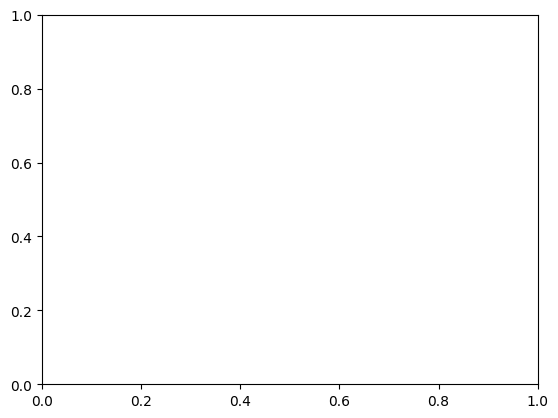

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_pred = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=np.where(y_pred==-1, 'red', y_pred), cmap='viridis', s=50)
plt.title('DBSCAN on Circles (red = noise)')
plt.show()



**26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


**27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.**

In [ ]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
dbscan = DBSCAN(eps=0.8, min_samples=5)
y_pred = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=np.where(y_pred==-1, 'red', y_pred), cmap='viridis', s=50)
plt.title('DBSCAN on Varying Std Dev Blobs (red = noise)')
plt.show()


**28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.**

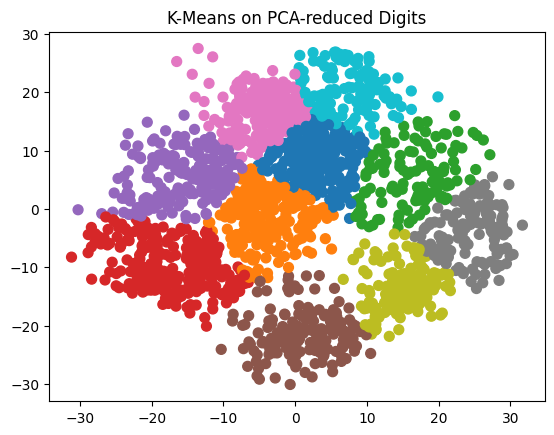

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred, cmap='tab10', s=50)
plt.title('K-Means on PCA-reduced Digits')
plt.show()


**29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.**

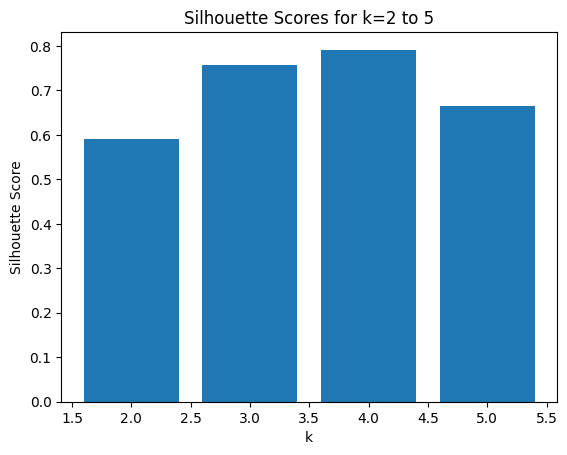

In [ ]:
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
ks = range(2,6)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.bar(ks, scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k=2 to 5')
plt.show()


**30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.**

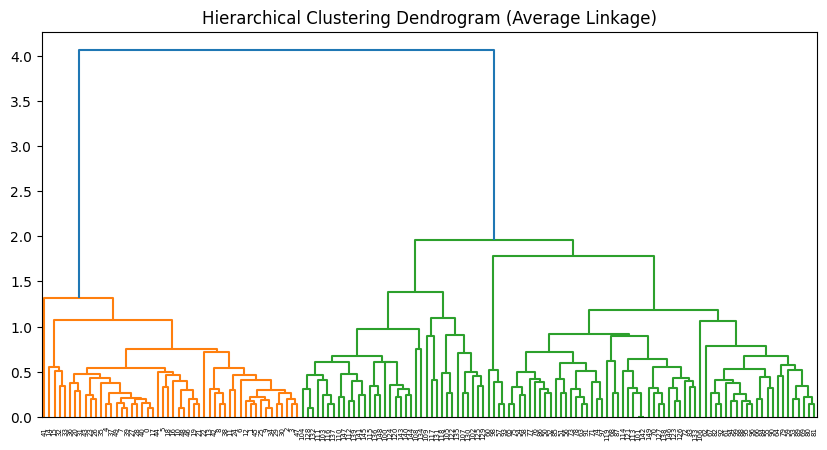

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = load_iris().data
linked = linkage(X, method='average')

plt.figure(figsize=(10,5))
dendrogram(linked, labels=None, distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.show()


**31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries**

Ans :

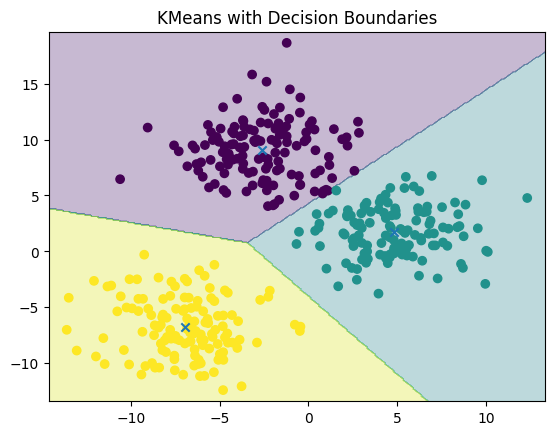

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=400, centers=3, cluster_std=2.5, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x')
plt.title("KMeans with Decision Boundaries")
plt.show()


**32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results**

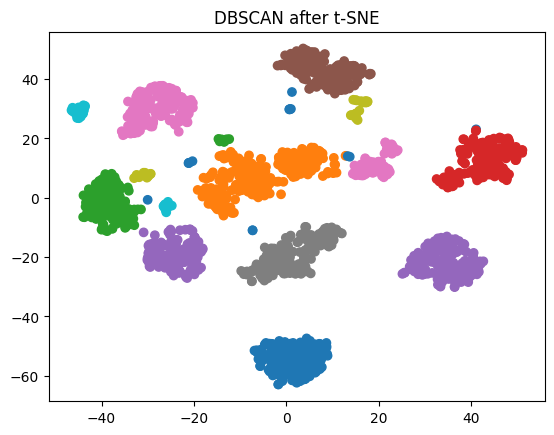

In [2]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

db = DBSCAN(eps=3, min_samples=5)
labels = db.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10')
plt.title("DBSCAN after t-SNE")
plt.show()


**33 . Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result**

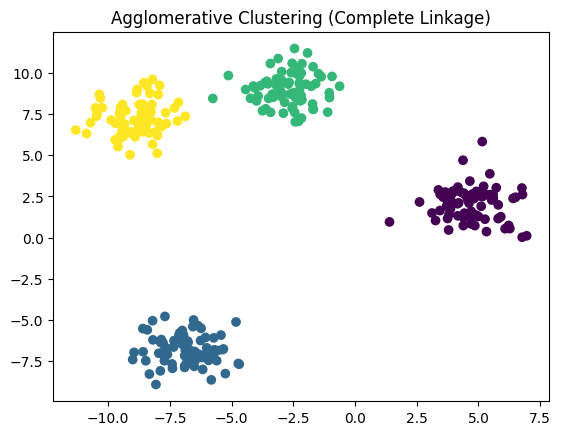

In [3]:
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


**34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot**

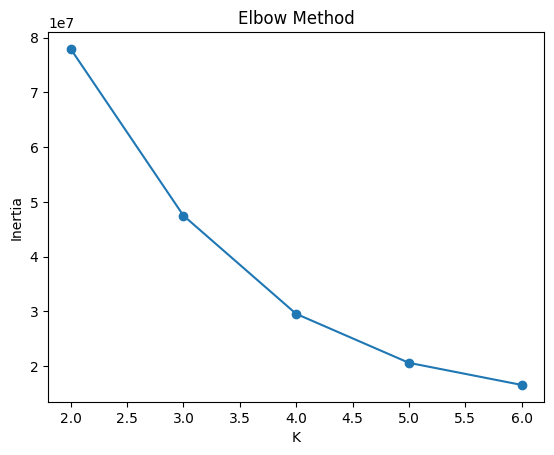

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = load_breast_cancer().data
inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


**35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage**

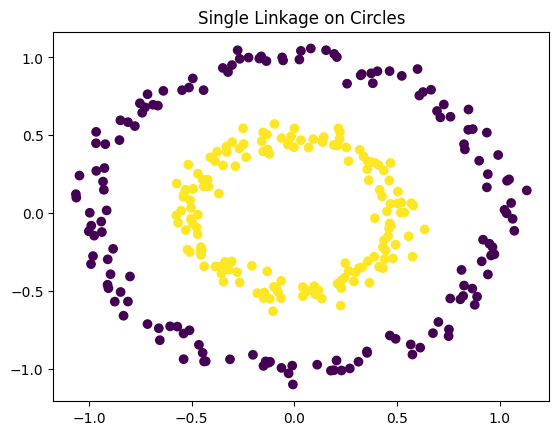

In [5]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Single Linkage on Circles")
plt.show()


**36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise**

In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(load_wine().data)
labels = DBSCAN(eps=1.5, min_samples=5).fit_predict(X)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", clusters)


Number of clusters: 0


**37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points**

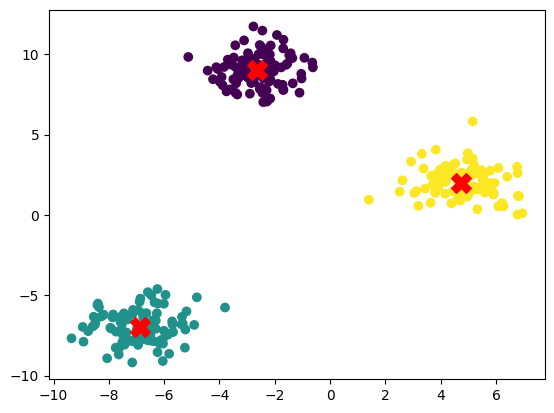

In [7]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200)
plt.show()


**38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise**

In [8]:
from sklearn.datasets import load_iris

X = load_iris().data
labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)

noise = list(labels).count(-1)
print("Noise samples:", noise)


Noise samples: 17


**39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result**

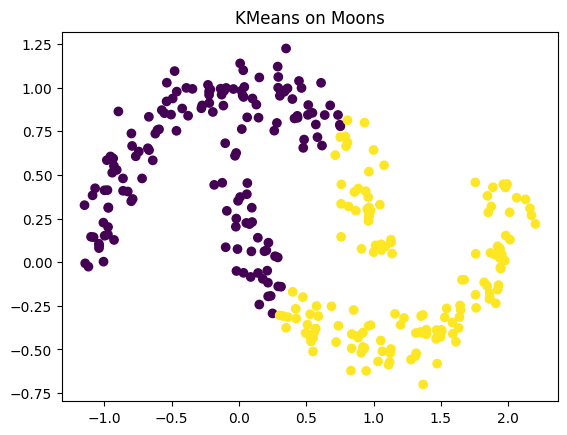

In [9]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1)

labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("KMeans on Moons")
plt.show()


40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.

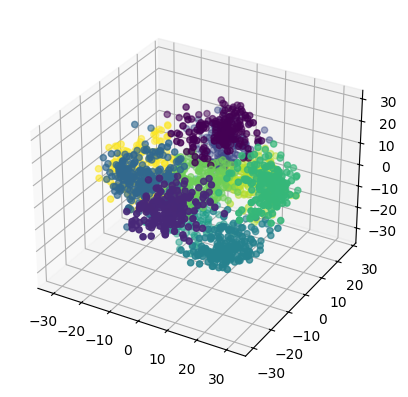

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X_pca = PCA(n_components=3).fit_transform(digits.data)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels)
plt.show()


41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering

In [11]:
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=400, centers=5, random_state=42)
labels = KMeans(n_clusters=5, random_state=42).fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.6771943882143446


42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D

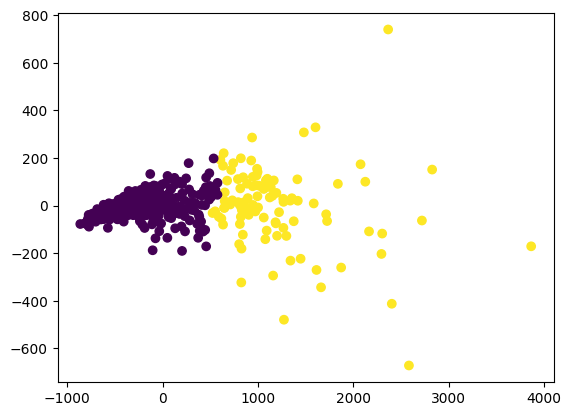

In [12]:
from sklearn.decomposition import PCA

X = load_breast_cancer().data
X_pca = PCA(n_components=2).fit_transform(X)

labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()


43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side

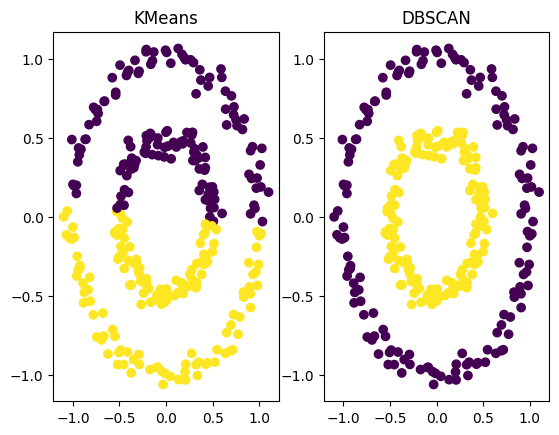

In [13]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=KMeans(2).fit_predict(X))
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=DBSCAN(eps=0.2).fit_predict(X))
plt.title("DBSCAN")

plt.show()


44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

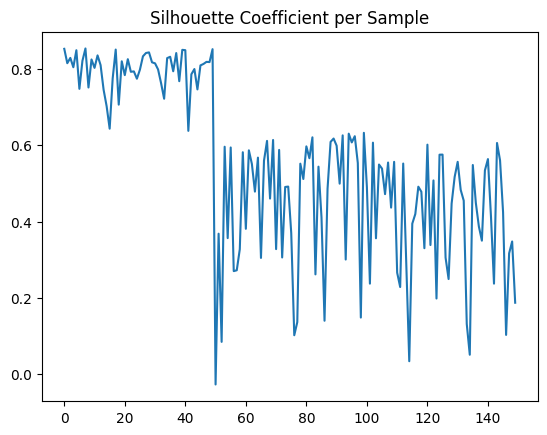

In [14]:
from sklearn.metrics import silhouette_samples

X = load_iris().data
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

scores = silhouette_samples(X, labels)
plt.plot(scores)
plt.title("Silhouette Coefficient per Sample")
plt.show()


45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters

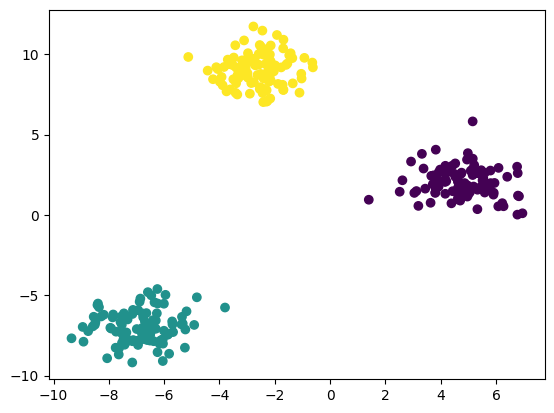

In [15]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

labels = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)

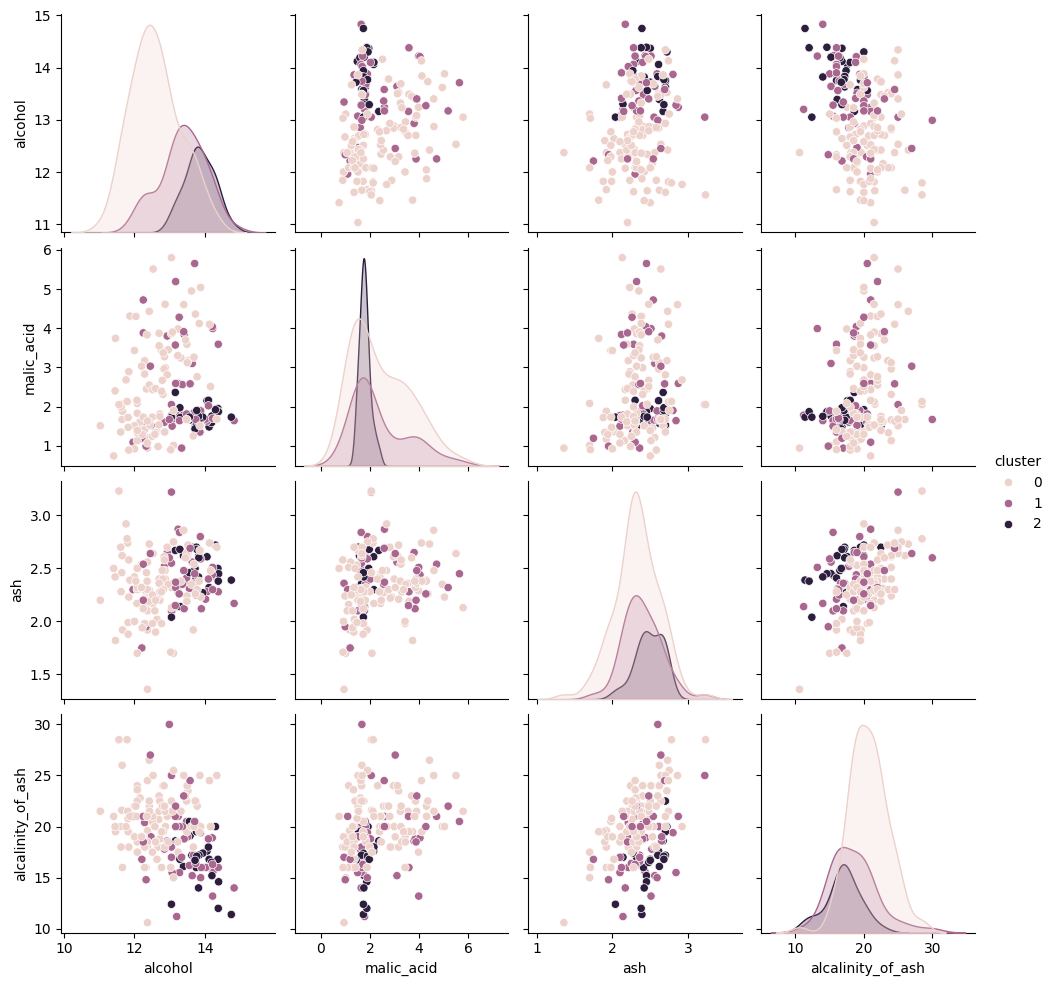

In [16]:
import seaborn as sns
import pandas as pd

wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])

df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(wine.data)

sns.pairplot(df, hue='cluster')
plt.show()


47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count

Noise points: 42


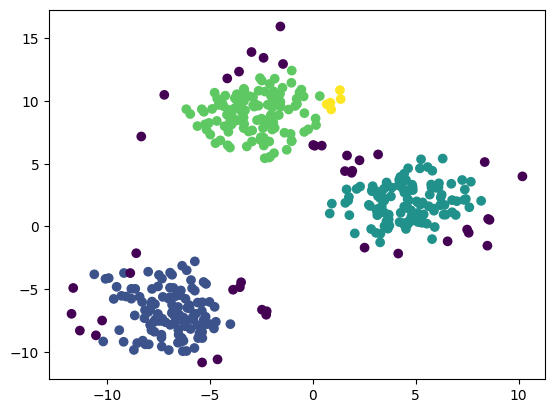

In [17]:
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.8, random_state=42)

labels = DBSCAN(eps=1, min_samples=5).fit_predict(X)

print("Noise points:", list(labels).count(-1))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.

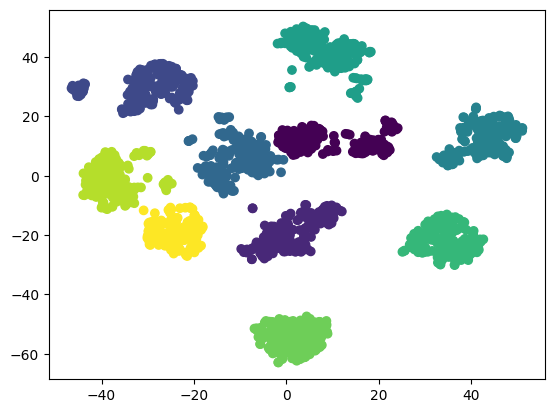

In [18]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(load_digits().data)

labels = AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.show()
